In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from src.configs.visualization_configs import FeatureDatetimeCfg
from src.utilities import find_project_root
from src.visualization import plot

plot.set_mpl_styles(fontsize=10)

In [2]:
cfg64 = FeatureDatetimeCfg.from_datetime(2025, 1, 23, 16, 14, 36)
cfg32 = FeatureDatetimeCfg.from_datetime(2025, 1, 23, 16, 41, 16)
datetime64 = "2024-12-18/16-56-50"
datetime32 = "2024-12-20/11-18-00"
checkdata64 = pl.read_csv(cfg64.feature_path / "features_check_data.csv")
checkdata32 = pl.read_csv(cfg32.feature_path / "features_check_data.csv")
traindata64 = pl.read_csv(cfg64.feature_path / "features_train_data.csv")
traindata32 = pl.read_csv(cfg32.feature_path / "features_train_data.csv")

In [3]:
arr64 = checkdata64.select(
    pl.exclude(["target", "prediction", "filename", "dirname"])
).to_numpy()
metacheckdata64 = checkdata64.select(
    pl.exclude(r"^column_\d+$")
).with_row_count("id")
trainarr64 = traindata64.select(
    pl.exclude(["target", "prediction", "filename", "dirname"])
).to_numpy()

arr32 = checkdata32.select(
    pl.exclude(["target", "prediction", "filename", "dirname"])
).to_numpy()
metacheckdata32 = checkdata32.select(
    pl.exclude(r"^column_\d+$")
).with_row_count("id")
trainarr32 = traindata32.select(
    pl.exclude(["target", "prediction", "filename", "dirname"])
).to_numpy()

In [18]:
sc64 = StandardScaler()
pca64 = PCA(random_state=42)
mm64 = MinMaxScaler((-1, 1))
trainarr64_std = sc64.fit_transform(trainarr64)
trainarr64_pca = pca64.fit_transform(trainarr64_std)
trainarr64_mm = mm64.fit_transform(trainarr64_pca)
arr64_std = sc64.transform(arr64)
arr64_pca = pca64.transform(arr64_std)
arr64_mm = mm64.transform(arr64_pca)
arrs64 = {"std": arr64_std, "pca": arr64_pca, "mm": arr64_mm}

sc32 = StandardScaler()
pca32 = PCA(random_state=42)
mm32 = MinMaxScaler((-1, 1))
trainarr32_std = sc32.fit_transform(trainarr32)
trainarr32_pca = pca32.fit_transform(trainarr32_std)
trainarr32_mm = mm32.fit_transform(trainarr32_pca)
arr32_std = sc32.transform(arr32)
arr32_pca = pca32.transform(arr32_std)
arr32_mm = mm32.transform(arr32_pca)
arrs32 = {"std": arr32_std, "pca": arr32_pca, "mm": arr32_mm}

axis_labels = {
    "std": (
        "Component 1",
        "Component 2",
    ),
    "pca": (
        "PC1",
        "PC2",
    ),
    "mm": (
        "Rescaled PC1",
        "Rescaled PC2",
    ),
}

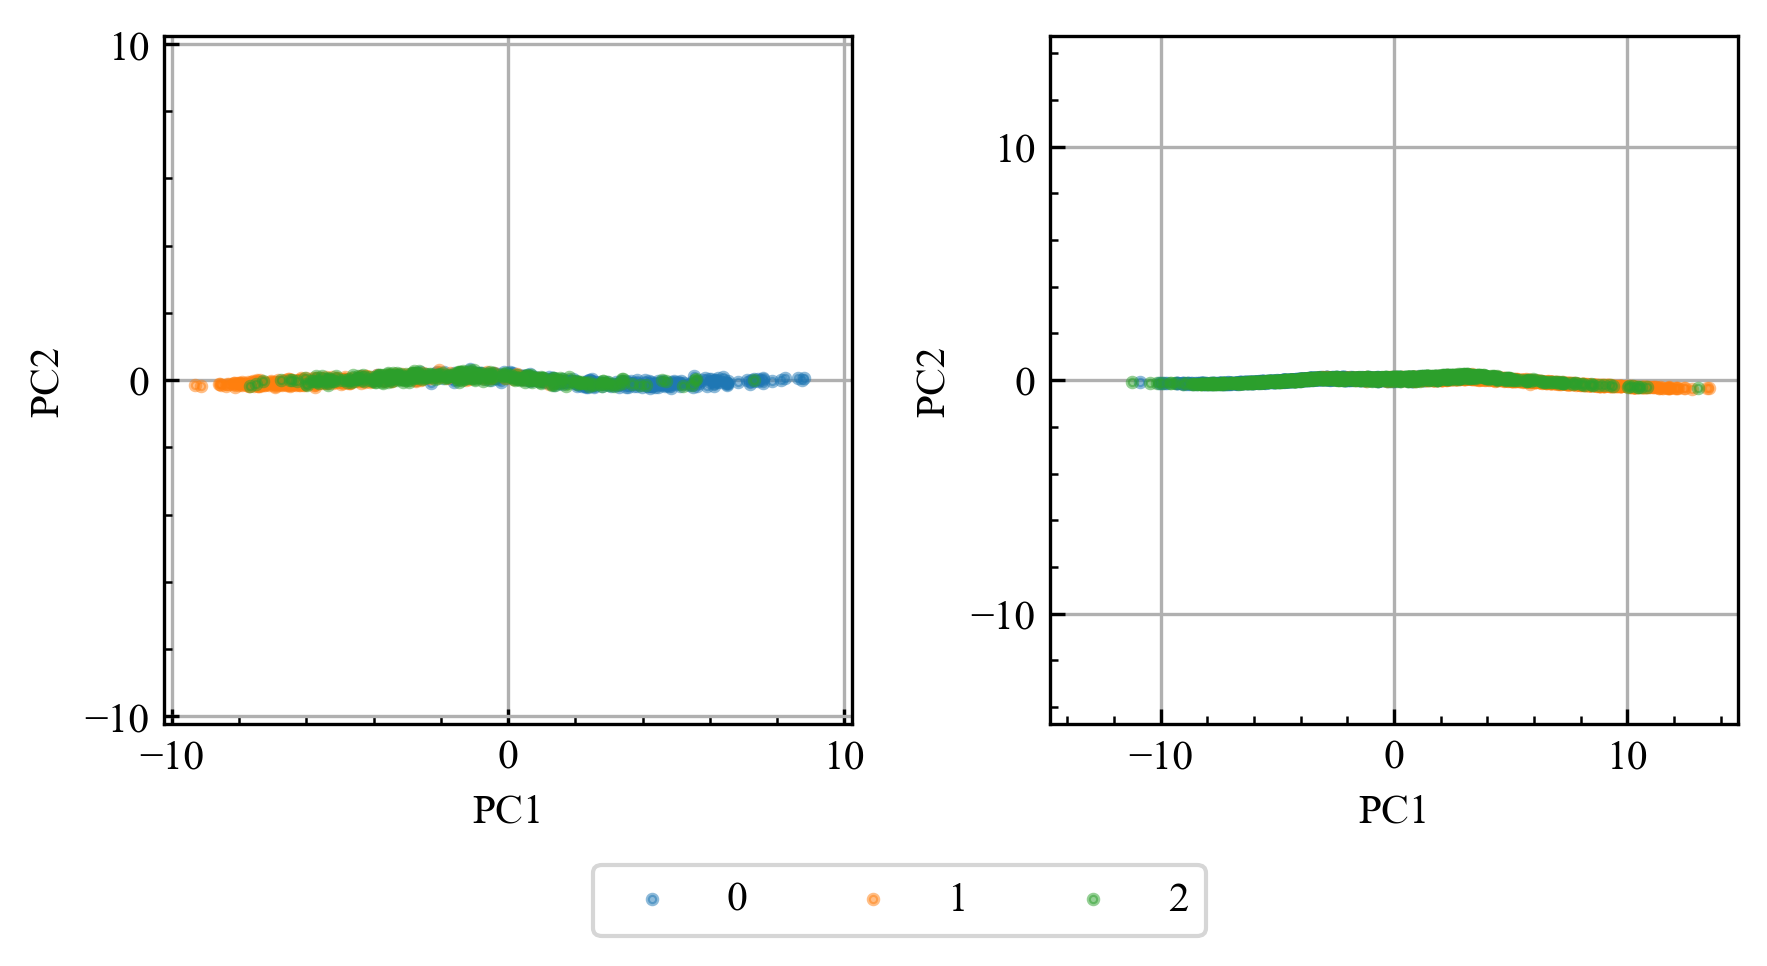

In [19]:
figsize = plot.cvt_unit((15, 7))
cmap = plt.get_cmap("tab10")
rt = "pca"
fig = plt.figure(figsize=figsize, layout="constrained", dpi=300)
axis_label = axis_labels[rt]

ax64 = fig.add_subplot(1, 2, 1)
dirnames = (
    metacheckdata64.filter((pl.col("target") == -1))
    .select("dirname")
    .to_series()
)
for d in dirnames.unique().sort():
    idxes = (
        metacheckdata64.filter(pl.col("dirname") == d).select("id").to_series()
    )
    ax64.scatter(
        arrs64[rt][idxes, 0],
        arrs64[rt][idxes, 1],
        color=cmap(d),
        s=5,
        alpha=0.5,
        label=d,
    )
ax64.set_xlabel(axis_label[0])
ax64.set_ylabel(axis_label[1])
ax64.set_aspect("equal")
ax64.set_axisbelow(True)
plot.set_xy_axes_range(ax64)
plot.align_xy_ticks_interval(ax64)

ax32 = fig.add_subplot(1, 2, 2)
dirnames = (
    metacheckdata32.filter((pl.col("target") == -1))
    .select("dirname")
    .to_series()
)
for d in dirnames.unique().sort():
    idxes = (
        metacheckdata32.filter(pl.col("dirname") == d).select("id").to_series()
    )
    ax32.scatter(
        arrs32[rt][idxes, 0],
        arrs32[rt][idxes, 1],
        color=cmap(d),
        s=5,
        alpha=0.5,
        label=d,
    )
ax32.set_xlabel(axis_label[0])
ax32.set_ylabel(axis_label[1])
ax32.set_aspect("equal")
ax32.set_axisbelow(True)
plot.set_xy_axes_range(ax32)
plot.align_xy_ticks_interval(ax32)
handles, labels = ax32.get_legend_handles_labels()
fig.legend(
    handles, labels, ncol=3, loc="upper center", bbox_to_anchor=(0.5, 0)
)

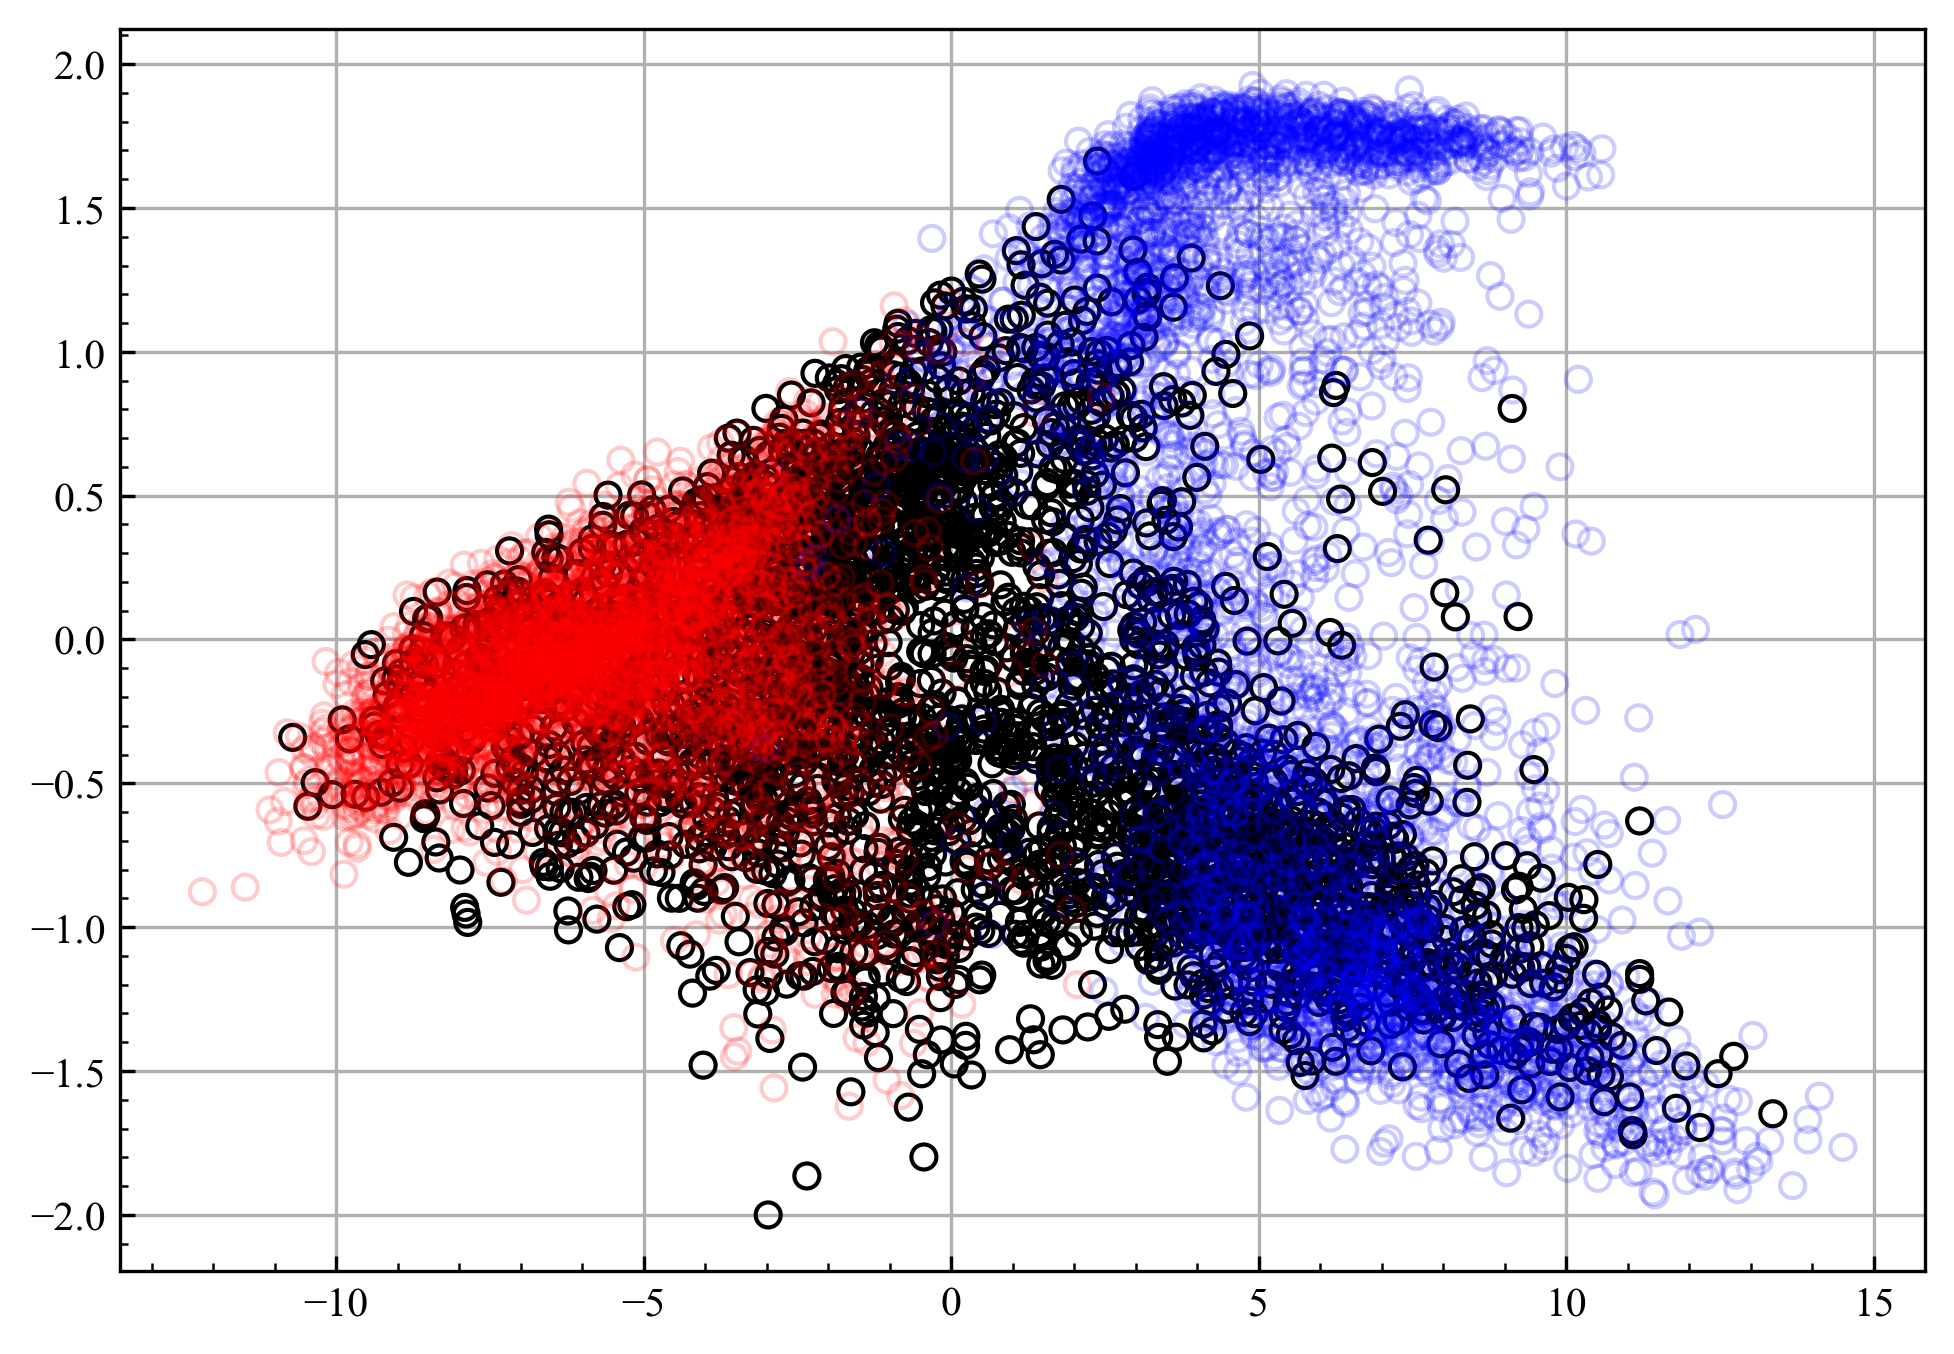

In [5]:
alpha = 0.2
cmap = {-1: "black", 0: (0, 0, 1, alpha), 1: (1, 0, 0, alpha)}
c = [cmap[t] for t in checkmetadata32.select("target").to_series()]
fig = plt.figure(figsize=(6.4, 4.4), layout="constrained", dpi=300)
ax = fig.add_subplot()
ax.scatter(
    checkarr32_pca[:, 0], checkarr32_pca[:, 1], facecolors="none", edgecolors=c
)

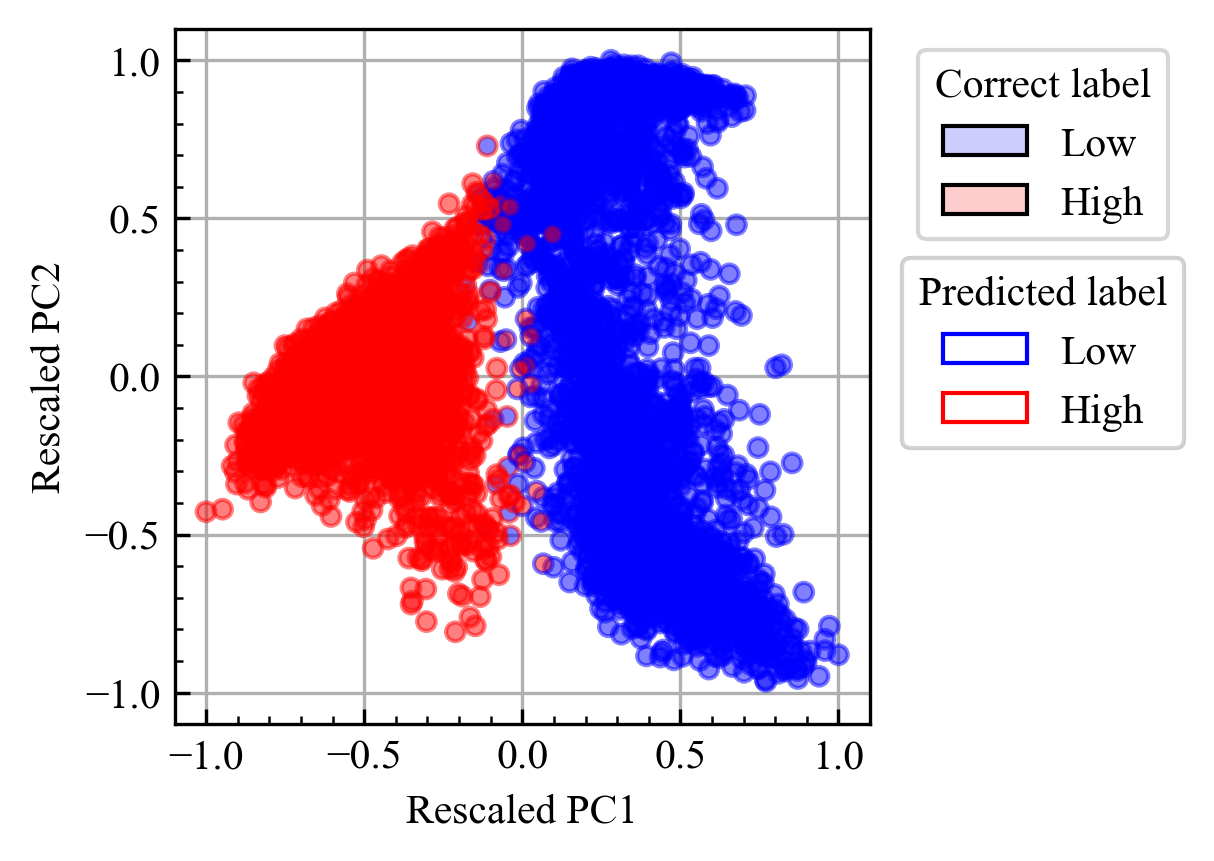

In [6]:
nontestdata = checkmetadata32.filter(pl.col("target") != -1)
nontestdata_ids = nontestdata.select("id").to_numpy().flatten().tolist()

axis_label = ("Rescaled PC1", "Rescaled PC2")
figsize = plot.cvt_unit(
    (10, 7),
)
alpha = 1
fig = plt.figure(figsize=figsize, layout="constrained", dpi=300)
ax = fig.add_subplot()
ax.set_xlabel(axis_label[0])
ax.set_ylabel(axis_label[1])
face_cmap = {-1: "black", 0: (0, 0, 1, alpha), 1: (1, 0, 0, alpha)}
edge_cmap = {-1: "black", 0: "blue", 1: "red"}

for t in nontestdata.select("target").to_series().unique():
    target_data = nontestdata.filter(pl.col("target") == t)
    ids = target_data.select("id")
    _, paths = plot.plot_scatter(
        checkarr32_mm[ids].T,
        ax,
    )
    # Face color means correct label.
    paths.set_facecolor(face_cmap[t])
    # edgecolor means predicted label.
    paths.set_edgecolor(
        [edge_cmap[p] for p in target_data.select("prediction").to_series()]
    )

correct_label_marker_legend = [
    Patch(facecolor=cmap[0], label="Low", edgecolor="black"),
    Patch(facecolor=cmap[1], label="High", edgecolor="black"),
]
predicted_label_marker_legend = [
    Patch(edgecolor=cmap[0], label="Low", facecolor="none", alpha=alpha),
    Patch(edgecolor=cmap[1], label="High", facecolor="none", alpha=alpha),
]

legend_x = 1.25
cl_legend = ax.legend(
    handles=correct_label_marker_legend,
    title="Correct label",
    loc="upper center",
    bbox_to_anchor=(legend_x, 1),
)
pl_legend = ax.legend(
    handles=predicted_label_marker_legend,
    title="Predicted label",
    loc="upper center",
    bbox_to_anchor=(legend_x, 0.7),
)
fig.add_artist(cl_legend)
fig.add_artist(pl_legend)

In [8]:
for ext in {"png", "pdf", "svg"}:
    dst = cfg.figure_path / f"distribution_copre.{ext}"
    fig.savefig(dst)